# K-Means原生代码实现

In [195]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io

In [196]:
def loaddata():
    data = np.loadtxt('data/cluster_data.csv',delimiter=',')
    return data

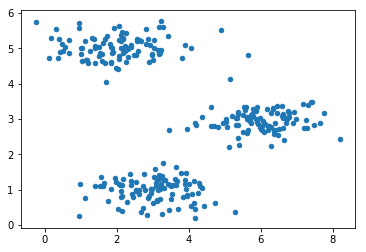

In [197]:
X = loaddata()
plt.scatter(X[:, 0], X[:, 1], s=20)

### 随机初始化质心
实际是从数据点X中随机选k个作为质心。如果不从X中选，而是随机初始，也是可以的，只是没有前者的收敛性好。

In [198]:
def kMeansInitCentroids(X, k):
    #从X的数据中随机取k个作为质心
    index = np.random.randint(0,len(X)-1,k)
    return X[index]

### 计算数据点到质心的距离，并判断该数据点属于哪个质心

In [199]:
def findClosestCentroids(X, centroids):
    #idx中数据表明对应X的数据是属于哪一个质心的
    idx = np.zeros(len(X)).reshape( X.shape[0],-1)
    for i in range(len(X)):
        minDistance = float('inf');#初始无限大
        index = 0
        for k in range(len(centroids)):
            #距离计算，使用欧几里得距离
            distance = np.sum(np.power(X[i]-centroids[k],2))
            if(distance<minDistance):
                minDistance = distance
                index = k
        idx[i]=index
    return idx

### 重新计算质心位置

In [200]:
def computeCentroids(X, idx):
    k = set(np.ravel(idx).tolist()) #找到所有聚类中心索引
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))
    for i in range(len(k)):
        #选择数据X中类别为k[i]的数据
        data = X[np.where(idx==k[i])[0]]
        #重新计算聚类中心
        centroids[i] = np.sum(data,axis=0)/len(data)
    return centroids

### 把所有的方法组合起来形成k-means算法

In [201]:
def k_means(X, k, max_iters):
    initial_centroids = kMeansInitCentroids(X,k)
    #迭代
    for i in range(max_iters):
        if i==0:
            centroids = initial_centroids
        #计算样本到质心的距离，并返回每个样本所属的质心
        idx = findClosestCentroids(X, centroids)
        #重新计算聚类中心
        centroids = computeCentroids(X, idx)
    return idx,centroids

In [202]:
idx,centroids = k_means(X, 3, 8)
print(idx)
print(centroids)

[[1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

### 画图

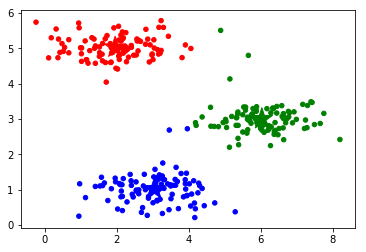

In [203]:
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), cmap=cm_dark, marker='*', s=500)
plt.show()
